In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as mtick
import warnings
warnings.simplefilter(action="ignore", category=(FutureWarning,UserWarning))



In [229]:
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [230]:
churn_data['Exited']=churn_data['Exited'].apply(lambda x: 'Лояльные клиенты' if x==0 else 'Ушедшие клиенты')

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

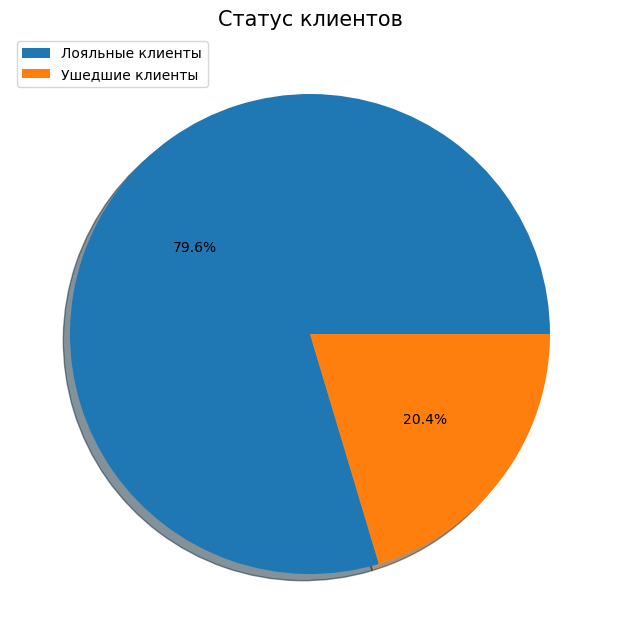

In [231]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,2,2])
ax.pie(churn_data['Exited'].value_counts(), autopct='%1.1f%%',shadow=True,radius=1)
plt.title('Статус клиентов', fontsize = 15)
plt.legend(churn_data['Exited'].value_counts().index, loc = 2)
plt.show()

Из банка ушла 1/4 часть клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

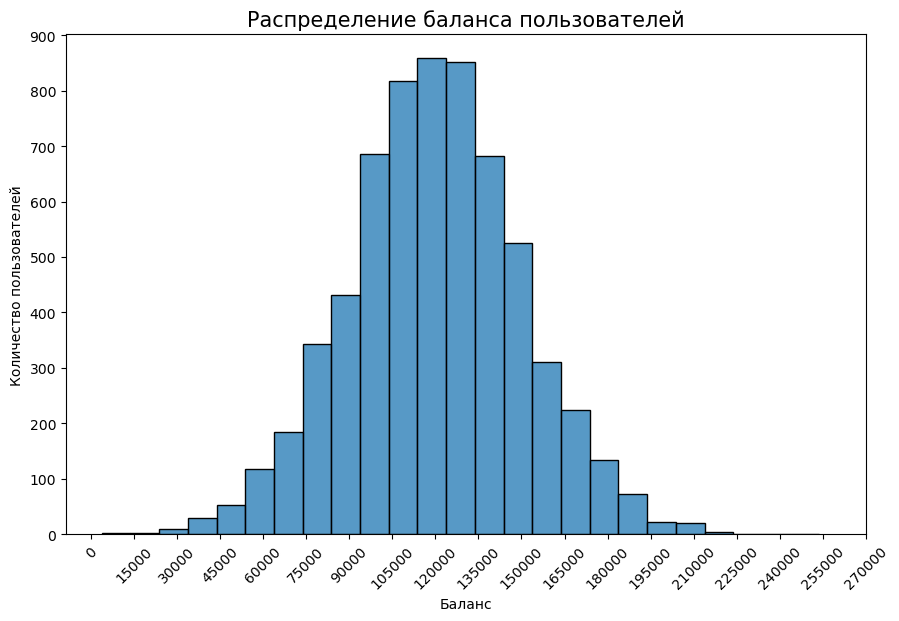

In [232]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.histplot(churn_data[churn_data['Balance']>2500]['Balance'],binwidth=10000)
plt.ylabel('Количество пользователей')
plt.xlabel('Баланс')
ax.xaxis.set_ticks(range(0,275000,15000))
ax.xaxis.set_tick_params(labelrotation = 45)
ax.yaxis.set_ticks(range(0,1000,100))
ax.set_title('Распределение баланса пользователей',fontsize = 15)
plt.show()



Большая часть клиентов хранит на счету от 100 до 150 тыс.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

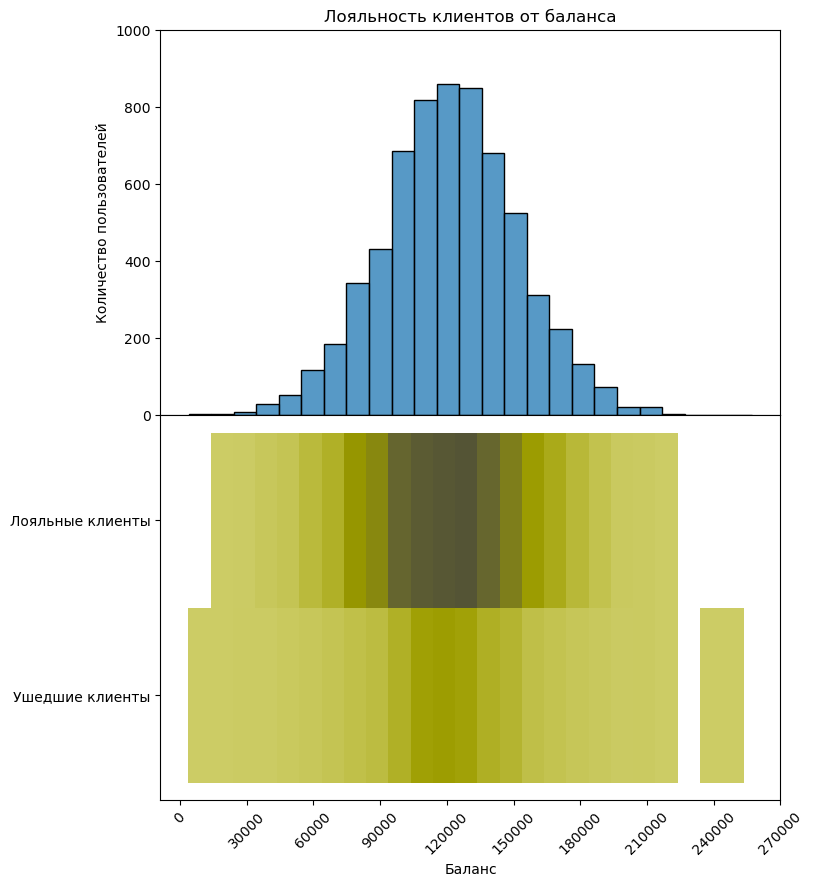

In [233]:
fig,axis= plt.subplots(nrows=2,ncols=1,figsize =(8,10))
plt.subplots_adjust(hspace=.0)
h_plot_1 = sns.histplot(churn_data[churn_data['Balance']>2500],x='Balance',binwidth=10000,ax=axis[0])
h_plot_2 = sns.histplot(churn_data[churn_data['Balance']>2500],x='Balance',y = 'Exited', binwidth=10000,ax=axis[1],color='yellow')
h_plot_1.set_ylabel('Количество пользователей')
h_plot_2.set_ylabel('')
h_plot_2.set_xlabel('Баланс')
h_plot_2.xaxis.set_ticks(range(0,275000,30000))
h_plot_2.xaxis.set_tick_params(labelrotation = 45)
h_plot_1.yaxis.set_ticks(range(0,1200,200))
h_plot_1.set_title('Лояльность клиентов от баланса')
plt.show()

По графику видно, что у лояльных клиентов денег значительно больше на счетах в банке, чем у ушедших.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

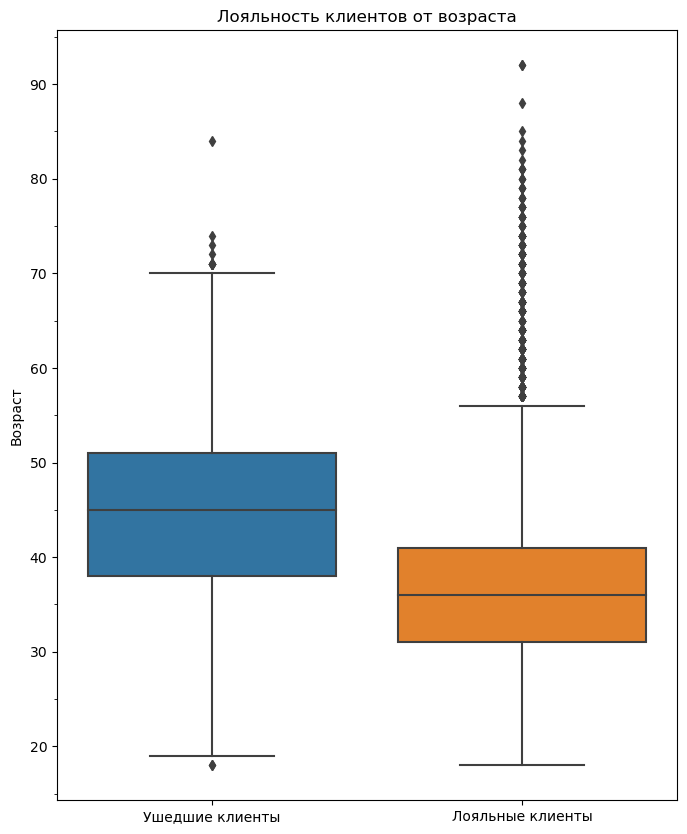

In [234]:
fig,axis = plt.subplots(figsize=(8,10))
sns.boxplot(data= churn_data[churn_data['Exited']=='Лояльные клиенты']['Age'],x = churn_data['Exited'],y = churn_data['Age'])
axis.set_xlabel('')
axis.set_ylabel('Возраст')
axis.set_title('Лояльность клиентов от возраста')
axis.yaxis.set_major_locator(MultipleLocator(10))
# axis.yaxis.set_minor_locator(AutoMinorLocator())
axis.yaxis.set_minor_locator(MultipleLocator(5))

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

(300.0, 900.0)

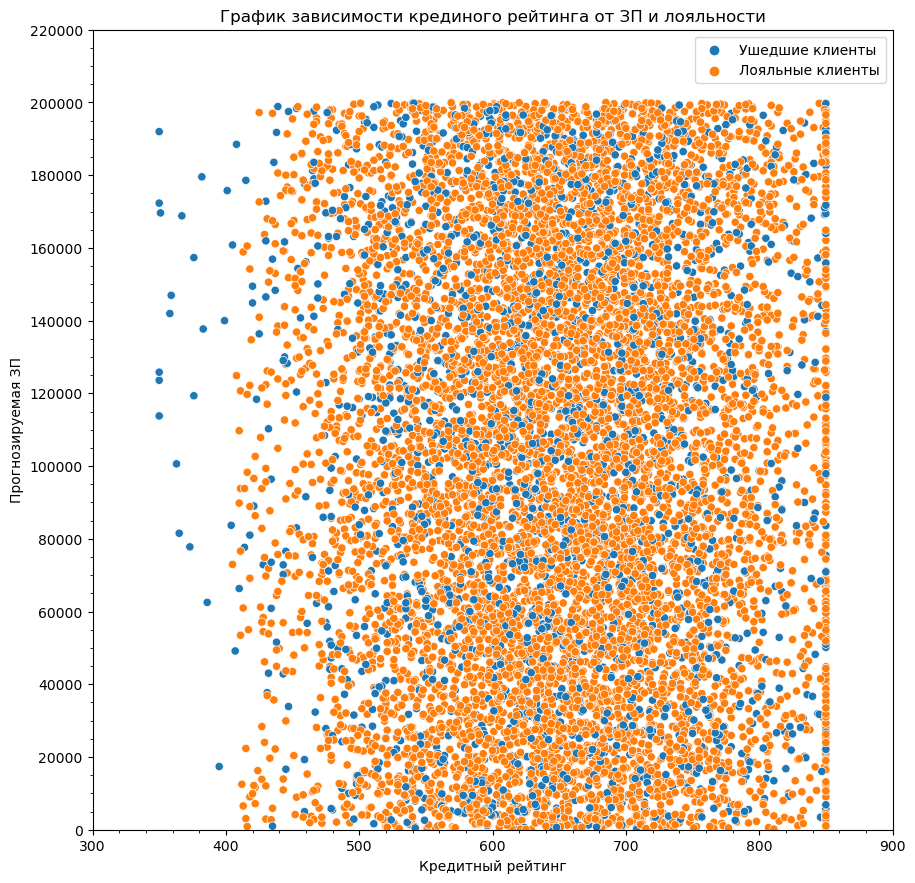

In [235]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
axis = fig.add_axes([0,0,1,1])
sns.scatterplot('CreditScore', 'EstimatedSalary',hue = 'Exited', data=churn_data)
axis.set_xlabel('Кредитный рейтинг')
axis.set_ylabel('Прогнозируемая ЗП')
axis.set_title('График зависимости крединого рейтинга от ЗП и лояльности')
axis.legend()
axis.xaxis.set_major_locator(MultipleLocator(100))
axis.yaxis.set_major_locator(MultipleLocator(20000))
axis.yaxis.set_minor_locator(AutoMinorLocator())
axis.xaxis.set_minor_locator(AutoMinorLocator())
axis.set_ylim(0,220000)
axis.set_xlim(300,900)


По графику нет прямой зависимости кредитного рейтига от ЗП. Однако, прослеживается зависимость от лояльности. Кредитный рейтинг ниже 400 имеется только у ушедших клиентов. А самый высокий преимущественно у лояльных пользователей. Основная масса пользователей сосредоточенна от 500 до 800 вне зависимости от лояльности или прогнозируемой ЗП.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [236]:
churn_data['Exited']=churn_data['Exited'].apply(lambda x: 0 if x == 'Лояльные клиенты' else 1)
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

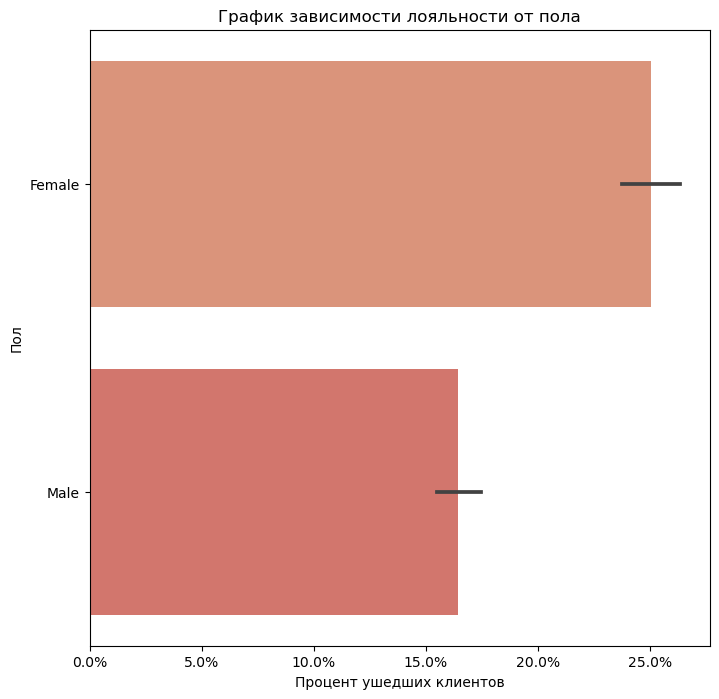

In [254]:
fig,ax = plt.subplots(figsize = (8,8))
sns.set_palette('flare')
sns.barplot(x='Exited',y='Gender',data = churn_data, estimator=np.mean)
ax.set_xlabel('Процент ушедших клиентов')
ax.set_ylabel('Пол')
ax.set_title('График зависимости лояльности от пола')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

По графику можно сделать вывод, что женщин уходит больше, чем мужчин.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [267]:
churn_data.shape[0]

10000

<AxesSubplot:xlabel='NumOfProducts', ylabel='RowNumber'>

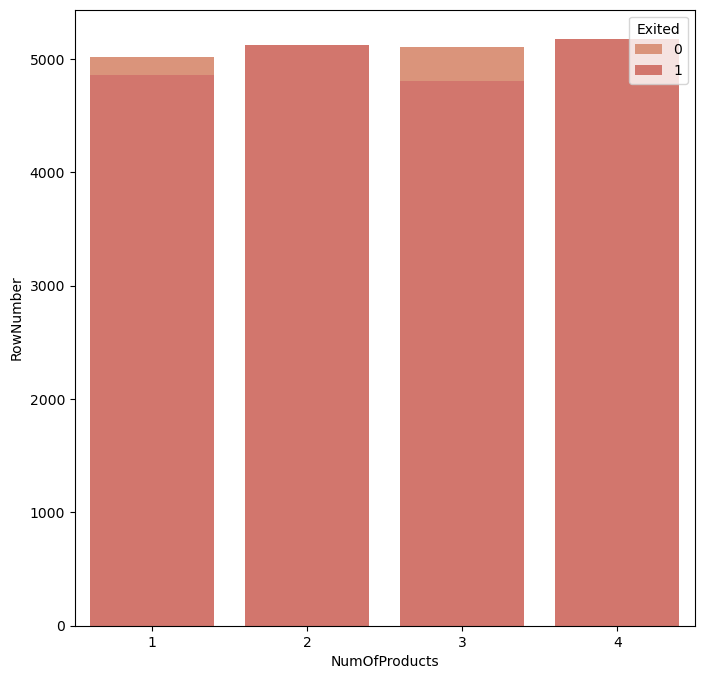

In [272]:
fig,ax = plt.subplots(figsize = (8,8))
# sns.set_palette('flare')
sns.barplot(x='NumOfProducts',y ='RowNumber',hue = 'Exited', data = churn_data, ci = None, dodge=False)
# ax.set_xlabel('Процент ушедших клиентов')
# ax.set_ylabel('Пол')
# ax.set_title('График зависимости лояльности от пола')
# ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.



9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
